# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 16

First let's set things up for business. 

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import pylab as plt

## Problem 1a

We need to use the program **apwp.py** to calculate the expected direction for the Mojave Desert (34.5N,117W).  So let's remind ourselves about how it works.  

In [2]:
!apwp.py -h


    NAME
        apwp.py

    DESCRIPTION
        returns predicted paleolatitudes, directions and pole latitude/longitude
        from apparent polar wander paths of Besse and Courtillot (2002).

    SYNTAX
        apwp.py [command line options][< filename]

    OPTIONS
        -h prints help message and quits
        -i allows interactive data entry
        -f file: read plate, lat, lon, age data from file
        -F output_file: write output to output_file 
        -P [NA, SA, AF, IN, EU, AU, ANT, GL] plate
        -lat LAT specify present latitude (positive = North; negative=South)
        -lon LON specify present longitude (positive = East, negative=West)
        -age AGE specify Age in Ma

     Note:  must have all -P, -lat, -lon, -age or none.

     OUTPUT
        Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long. 

    


Don't forget the minus sign on the longitude!

In [3]:
!apwp.py -lat 34.5 -lon -117.5 -age 20 -P NA 

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    20.0    34.7   349.2    54.1    81.1   156.7



In [4]:
ExpDec=349.2  # might as well keep these for later. 
ExpInc=54.1

## Problem 1b

I went to http://earthref.org/MagIC/search and filled in the search criteria as requested and downloaded a file in  a Project Directory called 'MojaveDesert'.  Now we can unpack it with **download_magic.py** as we did in Chapter_15.   

In [5]:
!download_magic.py -WD Chapter_16/MojaveDesert -f magic_downloaded_rows.txt

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -O, -sep
Traceback (most recent call last):
  File "/Users/ltauxe/Programs/PmagPy/GIT/PmagPy/programs/download_magic.py", line 58, in <module>
    main()
  File "/Users/ltauxe/Programs/PmagPy/GIT/PmagPy/programs/download_magic.py", line 53, in main
    ipmag.download_magic(infile, dir_path, input_dir_path, overwrite, True, data_model, sep)
  File "/Users/ltauxe/Programs/PmagPy/GIT/PmagPy/pmagpy/ipmag.py", line 3467, in download_magic
    f = codecs.open(infile, 'r', "utf-8")
  File "/Users/ltauxe/anaconda3/lib/python3.6/codecs.py", line 895, in open
    file = builtins.open(filename, mode, buffering)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/ltauxe/Documents/writing_stuff/Notebook_GIT/Essentials_Notebooks/Chapter_16/Chapter_16/MojaveDesert/magic_downloaded_rows.txt'


## Problem 1c

We are asked to make an equal area plot of all the Miocene poles, so we will have to read the data in plot  those.  

I know by now (and also by reading the information on the MagIC database in the PmagPy cookbook (http://earthref.org/PmagPy/cookbook) and in the data model link on the MagIC website that the locations.txt tables are tab delimited with column headers on the second line.  So, I'll read in the sites table into a Pandas DataFrame and wrangle that. 

In [6]:
file='Chapter_16/MojaveDesert/locations.txt' # make a filename
alldata=pd.read_csv(file,sep='\t',header=1)
alldata.head()

,age_high,age_low,age_unit,citations,conglomerate_test,contact_test,continent_ocean,country,description,dir_alpha95,...,pole_dm,pole_dp,pole_lat,pole_lon,pole_reversed_perc,region,result_name,result_type,reversal_test,rock_magnetic_test
0,24.0,18.0,Ma,10.1016/0012-821X(94)90107-4,G+,ND,North America,U.S.A.,"Thermal to 590C, characteristic component. Con...",4.9,...,7.0,5.0,89.3,243.0,0.0,California,7248.0,i,ND,ND
1,24.0,18.0,Ma,10.1016/0012-821X(94)90107-4,G+,ND,North America,U.S.A.,"Thermal to 590C, characteristic component. Con...",4.7,...,7.0,5.0,89.3,243.0,0.0,California,7248.0,i,ND,ND
2,27.0,21.0,Ma,10.1029/JB080I015P12467,ND,ND,North America,U.S.A.,Late Oligocene to Early Miocene. AF to 80mT. T...,7.5,...,12.1,9.8,2.1,272.2,-1.0,California,329.0,i,ND,ND
3,21.0,15.0,Ma,10.1029/96TC00131,ND,ND,North America,U.S.A.,"N/NW Group. AF to 150mT, characteristic compon...",6.3,...,8.8,6.1,81.5,148.5,0.0,Northern Mojave Desert,8186.0,i,ND,ND
4,23.0,10.0,Ma,10.1029/JB087IB05P03819,ND,ND,North America,U.S.A.,Intercalated basalts. Upper part is Lower to M...,5.9,...,8.6,8.6,78.3,223.2,58.0,California,263.0,i,Rc,ND


In [7]:
alldata.citations.unique()

array(['10.1016/0012-821X(94)90107-4', '10.1029/JB080I015P12467',
       '10.1029/96TC00131', '10.1029/JB087IB05P03819',
       '10.1029/JB073I002P00711', '10.1029/89JB03298',
       'ROSS ET AL. (1989)', '10.1029/2001JB000524'], dtype=object)

Looks like we have some cleaning to do.  First, we should use only the tilt corrected data (dir_tilt_correction=100). 

In [8]:
data=alldata[alldata.dir_tilt_correction==100]

And we should verify that the data fall within our bounds:

In [9]:
print (data.lat_s.min(),data.lat_n.max(),data.lon_w.min(),data.lon_e.max())

34.8 35.5 241.2 244.0


So, let's plot it up 

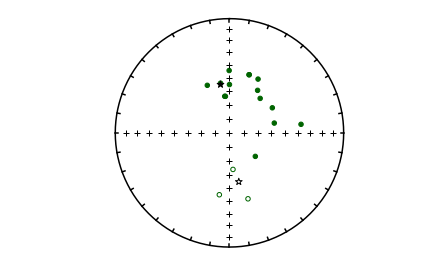

In [10]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(data.dir_dec.values,data.dir_inc.values,color='darkgreen')
ipmag.plot_di(ExpDec,ExpInc,color='black',marker='*',markersize=50)# put on the Expected normal direction
ipmag.plot_di((ExpDec-180)%360,-ExpInc,color='black',marker='*',markersize=50)

Wow - that looks weird - so I'm going to plot these in 5 Ma age groups. So let's look at the ages

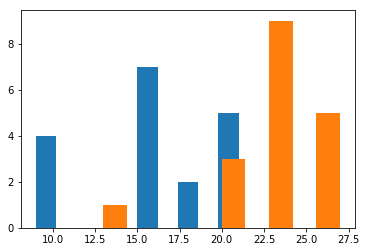

In [11]:
plt.hist(data.age_low)
plt.hist(data.age_high);

In [12]:
young=data[data.age_low<15]
mid=data[(data.age_low>=15)&(data.age_low<20)]
old=data[(data.age_low>=20) & (data.age_low<25)]

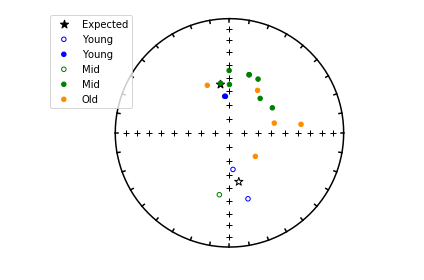

In [13]:
ipmag.plot_net(1) # make an equal angle net
ipmag.plot_di(ExpDec,ExpInc,color='black',marker='*',markersize=75,legend='yes',label='Expected')# put on the Expected normal direction
ipmag.plot_di((ExpDec-180)%360,-ExpInc,color='black',marker='*',markersize=75)
ipmag.plot_di(young.dir_dec.values,young.dir_inc.values,color='blue',legend='yes',label='Young') 
ipmag.plot_di(mid.dir_dec.values,mid.dir_inc.values,color='green',legend='yes',label='Mid') 
ipmag.plot_di(old.dir_dec.values,old.dir_inc.values,color='darkorange',legend='yes',label='Old') 


So... between ~15 to 25 Ma there must have been some rotation going on.  But not everywhere!  In the Chapter, there is a discussion about 'displaced terranes'.  Perhaps the Mojave is one of those.  At least it appears to have undergone significant vertical axis rotation!  Or got hit by lightning or something...

## Problem 2:

Site 522 was drilled on the African plate and ranged in age from 23 to 35 Ma (or so).  So I should use apwp.py to get directions at the site location (26$^{\circ}$S/5$^{\circ}$W). 

In [14]:
!apwp.py -lat -26 -lon -5 -age 33 -P AF

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    33.0   -35.6   353.7   -55.1    78.9   202.9



In [15]:
!apwp.py -lat -26 -lon -5 -age 23 -P AF

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
    23.0   -33.3     0.1   -52.7    82.7   174.6



We'll have to read the data in (again - see solutions to Chapter 15), and calculation averages at the top and the bottom.

In [16]:
specimens=pd.read_csv('../Chapter_15/Chapter_15/specimens.txt',sep='\t',header=1)
specimens=specimens.dropna(subset=['analysts']) # kill unwanted lines with duplicate or irrelevent info
specimens['site']=specimens['specimen'] # make a column with site name
sites=pd.read_csv('../Chapter_15/Chapter_15/sites.txt',sep='\t',header=1)
data=pd.merge(specimens,sites,on='site') # merge the two data frames on site


MaxDepth=data.core_depth.max()
MinDepth=data.core_depth.min()
print (MaxDepth,MinDepth)

146.7 55.23


I want to take the top and bottom 10 meters.  

In [17]:
TopIncs=data[data.core_depth<65].dir_inc.values
BottomIncs=data[data.core_depth>136].dir_inc.values
print ('Top 10 m average inclination: ',pmag.doincfish(TopIncs))
print ('Bottom 10 m average inclination: ',pmag.doincfish(BottomIncs))

Top 10 m average inclination:  {'n': 276, 'ginc': 50.44166666666662, 'inc': 51.971666666666522, 'r': 265.08627542044349, 'k': 25.197630560984411, 'alpha95': 0.99944043396377436, 'csd': 16.136344856646417}
Bottom 10 m average inclination:  {'n': 279, 'ginc': 54.244802867383484, 'inc': 59.254802867383177, 'r': 252.07921893718697, 'k': 10.326594884128928, 'alpha95': 0.9958058147194363, 'csd': 25.206146086833229}


Wow.  These data (50 and 54 respectively) match really well with the Besse and Courtillot (2002) predictions of 53 and 55 respectively.   In fact, they used the Site 522 data to help make their APWPs! 

## Problem 3a:

I looked up in the Appendix and found the rotation pole for North America to South Africa at 90 Ma to be $\lambda$=74.6, $\phi$=-23, and $\Omega$  = 33.8.   And we were told the North American pole to rotate:  $\lambda=75.2^{\circ}, \phi=201^{\circ}$. 

In [18]:
Prot=[74.6,-23,33.8] # finite pole of rotation
plat,plon=75.2,201

Now for the subroutine.  I'm cheating a bit because I already wrote this and it is in the **pmag** module.  But since I wrote it, I can copy it here.  I also am using the function **pmag.dir2cart** because we did that already a million times.

In [19]:
def PTrot(EP,Lats,Lons):
    """ Does rotation of points on a globe  by finite rotations, 
    using method of Cox and Hart 1986, box 7-3. """
# gets user input of Rotation pole lat,long, omega for plate and converts to radians
    E=pmag.dir2cart([EP[1],EP[0],1.])
    omega=EP[2]*np.pi/180.
    RLats,RLons=[],[]
    for k in range(len(Lats)):
      if Lats[k]<=90.: # peel off delimiters
# converts to rotation pole to cartesian coordinates
        A=pmag.dir2cart([Lons[k],Lats[k],1.])
# defines cartesian coordinates of the pole A
        R=[[0.,0.,0.],[0.,0.,0.],[0.,0.,0.]]
        R[0][0]=E[0]*E[0]*(1-np.cos(omega)) + np.cos(omega)
        R[0][1]=E[0]*E[1]*(1-np.cos(omega)) - E[2]*np.sin(omega)
        R[0][2]=E[0]*E[2]*(1-np.cos(omega)) + E[1]*np.sin(omega)
        R[1][0]=E[1]*E[0]*(1-np.cos(omega)) + E[2]*np.sin(omega)
        R[1][1]=E[1]*E[1]*(1-np.cos(omega)) + np.cos(omega)
        R[1][2]=E[1]*E[2]*(1-np.cos(omega)) - E[0]*np.sin(omega)
        R[2][0]=E[2]*E[0]*(1-np.cos(omega)) - E[1]*np.sin(omega)
        R[2][1]=E[2]*E[1]*(1-np.cos(omega)) + E[0]*np.sin(omega)
        R[2][2]=E[2]*E[2]*(1-np.cos(omega)) + np.cos(omega)
# sets up rotation matrix
        Ap=[0,0,0]
        for i in range(3):
            for j in range(3):
                Ap[i]+=R[i][j]*A[j]
# does the rotation
        Prot=pmag.cart2dir(Ap)
        RLats.append(Prot[1])
        RLons.append(Prot[0])
      else:  # preserve delimiters
        RLats.append(Lats[k])
        RLons.append(Lons[k])
    return RLats,RLons


Now to call it with all my parameters. 

In [20]:
print (PTrot(Prot,[plat],[plon]))

([67.092529767349802], [244.36711746757442])


The African pole is $\lambda=66.8^{\circ}, \phi=244.5^{\circ}$, and we got 67.1$^{\circ}$ and 244.4$^{\circ}$.  Hot diggety dog.  (Now you know how old I am.)

## Problem 4a:

I went to the MagIC search engine  and downloaded late Cretaceous data from Europe  as instructed in the book.  I saved both the sites and the locations tables.  Now I'll unpack the data files with **download_magic.py**

In [21]:
!download_magic.py -WD  Chapter_16/Europe -f magic_downloaded_rows.txt

Using default arguments for: -F, -A, -ID, -Fsa, -Fsi, -O, -sep
working on:  'contribution'
1  records written to file  Chapter_16/Europe/contribution.txt
contribution  data put in  Chapter_16/Europe/contribution.txt
working on:  'locations'
250  records written to file  Chapter_16/Europe/locations.txt
locations  data put in  Chapter_16/Europe/locations.txt


So, let's take a look at what we have by reading the location.txt file into a Pandas DataFrame and finding the method codes available. 

In [22]:
poles=pd.read_csv('Chapter_16/Europe/locations.txt',sep='\t',header=1)
poles.method_codes.unique()


array(['DE-DI:LT-AF-Z:LP-DC2', 'DE-DI:LT-T-Z:LP-DC4',
       'DE-DI:LT-AF-Z:LT-T-Z:LP-DC2', 'DE-DI:LT-AF-Z:LT-T-Z:LP-DC4',
       'DE-DI:LT-AF-Z:LT-T-Z:LP-DC3', 'DE-DI:LT-T-Z:LP-DC3',
       'DE-DI:LT-AF-Z:LP-DC3', 'DE-DI:LT-NO:LP-DC0', 'DE-DI:LT-T-Z:LP-DC2',
       'DE-DI:LT-NO:LP-DC1', 'DE-DI:LT-CHEM:LT-T-Z:LP-DC3',
       'DE-DI:LT-AF-Z:LT-T-Z:LP-DC5', 'DE-VGP:FS-H:LT-AF-Z:SO-NO:LP-DC3',
       'DE-DI:FS-H:LT-AF-Z:SO-NO:LP-DC3', 'DE-DI:LT-T-Z:LT-T-Z:LP-DC4',
       'DE-DI:FS-H:LT-AF-Z:SO-NO:LP-DC2'], dtype=object)

Now let's fish out the "best" poles with LP-DC4 or LP-DC5. 

In [26]:
dc4=poles[poles.method_codes.str.contains('DC4')]
dc5=poles[poles.method_codes.str.contains('DC5')]
best_poles=pd.concat([dc4,dc5])

## Problem 4b:

Some of the data were included in other results, were overprints, or were otherwise superceded.  These details are in a comment field called description.  So let's read these descriptions and figure out how to eliminate the ones we don't want. 

In [28]:
for ind in best_poles.index:
    print (ind, best_poles.loc[ind].description)

2 Fransian - Famennian. Thermal, characteristic component, 500-610C. IRM, 3-axis Jrs-T (HEM, MAGN). Late Jurassic - Early Cretaceous remagnetisation suggested.
5 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
6 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
7 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
8 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
11 Neocomian to Aptian age?. AF to 100mT, thermal to 300C, characteristic component. Secondary magnetization mid-Tertiary?.
12 Neocomian to Aptian age?. AF to 100mT, thermal to 300C, characteristic component. Secondary magnetization mid-Tertiary?.
29 Aptian to Albian. AF to 80mT, thermal to 500C, characteristic component. IRM (no sat. 1. 2T). Data incl. in RESULTNOS 9235, 9236.
30 Aptian to Albian

Now we want to thumb through the  descriptions and eliminate the kind we don't want.  For example, if we make a list of unwanted descriptors (verprint, emagneti, uperseded, Data incl. in RESULTNOS), from the above list,  we can eliminate those. 

In [35]:
Unwanted=['verprint','econdary','emagneti','uperseded','Data incl. in RESULT'] # verprint includes both Overprint and overprint
# make a column for "Use" in best_poles and set to True
best_poles['Use']=True
# now go through and flag the bad boys
for deleteme in Unwanted:
    best_poles.loc[best_poles.description.str.contains(deleteme),'Use']='False'
selected_poles=best_poles[best_poles.Use==True]
for ind in selected_poles.index:
    print (ind, selected_poles.loc[ind].description)



5 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
6 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
7 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
8 Upper Hauterivian to Albian. Extent Thickness 117m. Thermal to 575C, AF to 100mT, characteristic component.
36 Aptian to Albian. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
37 Aptian to Albian. Thermal to 500C, characteristic component 250-500C. IRM (sat. 0. 4T) ; HYST.
47 AF to 60mT, thermal to 550C, characteristic component.
48 AF to 60mT, thermal to 550C, characteristic component.
51 Pliensbachian to Callovian age. Thermal to 650C. Js-T (CT 100, 650C) , OP (GOETH, HEM, MAGN) , SUSC, AN. Late Cretaceous magnetization.
52 Pliensbachian to Callovian age. Thermal to 650C. Js-T (CT 100, 650C) , OP (GOETH, HEM, MAGN) , SUSC, AN. L

Here's a list of all the locations we have

In [53]:
selected_poles.location

5                                       Cismon Section
6                                       Cismon Section
7                                       Cismon Section
8                                       Cismon Section
36                     Organya Aptian-Albian Sediments
37                     Organya Aptian-Albian Sediments
47                         Lower Cretaceous Limestones
48                         Lower Cretaceous Limestones
51                        Bulgarian Jurassic Sediments
52                        Bulgarian Jurassic Sediments
53                        Bulgarian Jurassic Sediments
55                     Scaglia Formation, Marsica Area
56                     Scaglia Formation, Marsica Area
57                                       Scaglia Rossa
58                                       Scaglia Rossa
59                                       Scaglia Rossa
60                                       Scaglia Rossa
76                                 Lower Scaglia Rossa
77        

Oops.  Looks like we have a lot of duplicates in our 'selected' pole list.  So to verify, let's look at the latitudes and longitudes: 


In [64]:
selected_poles[['pole_lat','pole_lon']]

,pole_lat,pole_lon
5,44.2,257.3
6,44.2,257.3
7,44.2,257.3
8,44.2,257.3
36,77.1,233.9
37,77.1,233.9
47,70.0,192.0
48,70.0,192.0
51,77.0,313.0
52,77.0,313.0


And yeah, there are a lot of duplicates.  So we want a unique list of poles.  I can use the Pandas drop_duplicates function!

In [66]:
selected_poles=selected_poles.drop_duplicates(['pole_lat','pole_lon'])
selected_poles[['pole_lat','pole_lon']]

,pole_lat,pole_lon
5,44.2,257.3
36,77.1,233.9
47,70.0,192.0
51,77.0,313.0
55,73.0,203.0
57,63.4,220.2
76,49.5,271.1
100,85.1,242.1
148,75.8,159.4
164,86.9,164.7


Now we have a pared down list of poles.  

## Problem 4c:

We have to use a program named pt_rot.py, so let's find out what it does.

In [67]:
!pt_rot.py -h


    NAME 
        pt_rot.py 

    DESCRIPTION
        rotates pt according to specified age and plate
 
    SYNTAX
        pt_rot.py [command line options]

    OPTIONS
        -h prints help and quits
        -f file with lon lat plate age Dplate as space delimited input
           Dplate is the destination plate coordinates desires 
           - default is "fixed south africa"
           Dplate should be one of: [nwaf, neaf,saf,aus, eur, ind, sam, ant, grn, nam]
        -ff file Efile,   file  has lat lon data file and Efile has sequential rotation poles: Elat Elon Omega 
        -F OFILE, output sites (pmag_results) formatted file with rotated points stored in pole_lon, pole_lat (vgp_lon, vgp_lat).  (data_model=2.5)
           default is to print out rotated lon, lat to standard output
        -dm [2.5,3] set data model for output.  Default is 3 
    


We are going to use the -ff option, so  we have to save the data in a file with these keys: pole_lat,pole_lon. 

In [68]:
out=np.array([selected_poles.pole_lat.values,selected_poles.pole_lon.values]).transpose()
np.savetxt('Chapter_16/selected_poles.out',out)
!cat Chapter_16/selected_poles.out

4.420000000000000284e+01 2.573000000000000114e+02
7.709999999999999432e+01 2.339000000000000057e+02
7.000000000000000000e+01 1.920000000000000000e+02
7.700000000000000000e+01 3.130000000000000000e+02
7.300000000000000000e+01 2.030000000000000000e+02
6.339999999999999858e+01 2.201999999999999886e+02
4.950000000000000000e+01 2.711000000000000227e+02
8.509999999999999432e+01 2.420999999999999943e+02
7.579999999999999716e+01 1.594000000000000057e+02
8.690000000000000568e+01 1.646999999999999886e+02
5.600000000000000000e+01 2.610000000000000000e+02
7.279999999999999716e+01 1.280999999999999943e+02
3.810000000000000142e+01 8.440000000000000568e+01
5.300000000000000000e+01 1.360000000000000000e+02
7.000000000000000000e+01 2.530000000000000000e+02


It's ugly, but it will do. For the next part, I put the rotation poles for Europe => Africa and Africa => North America from the Appendix in a file called Epole in the Chapter_16 directory, so let's have a look at that.

In [69]:
!cat Chapter_16/Epoles

40.2 -12.5 28.5
70 -24 -40.2


We should be all set to run pt_rot.py now:

In [70]:
!pt_rot.py -ff Chapter_16/selected_poles.out Chapter_16/Epoles -F Chapter_16/selected_poles.rot
!cat Chapter_16/selected_poles.rot

15  records written to file  ./Chapter_16/selected_poles.rot
tab 	locations
pole_lat	pole_lon
44.2	257.3
77.1	233.9
70.0	192.0
77.0	313.0
73.0	203.0
63.4	220.2
49.5	271.1
85.1	242.1
75.8	159.4
86.9	164.7
56.0	261.0
72.8	128.1
273.0	85.4
53.0	136.0
70.0	253.0


We can plot that file using **ipmag.plot_vgp** function (similar to in Chapter 14).  So, we need to import the Basemap function from mpl_toolkits (you might have to install this).

In [71]:
from mpl_toolkits.basemap import Basemap

Now we need to do two things:  1) read in the file _selected_poles.rot_ and 2) figure out what the pole for North America was.  First the latter.  I can use the program apwp.py for this, but I have to put in dummy lat and lon keys and ignore the Paleolat, Dec, Inc output and zoom in on the Pole_lat Pole_long output. 

In [72]:
!apwp.py -lat 33 -lon -117 -P NA -age 100

Age  Paleolat.  Dec.  Inc.  Pole_lat.  Pole_Long.
   100.0    38.8   352.4    58.1    81.5   198.3



So the North American pole was 81.5N/198.3E at 100 Ma.

In [73]:
NApole_lat,NApole_lon=81.5, 198.3

Read in the data from selected_poles.rot as a DataFrame. selected_poles.rot is a regular MagIC formated file, so we know what to do by now:

In [75]:
rot_poles=pd.read_csv('Chapter_16/selected_poles.rot',sep='\t',header=1)

And we plot the stuff:  

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


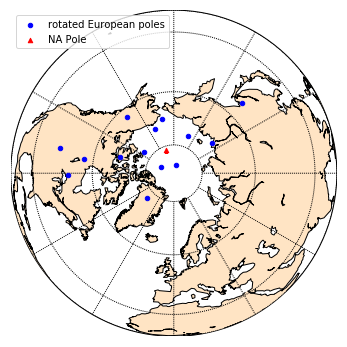

In [76]:
m=Basemap(projection='ortho',lat_0=90,lon_0=0,resolution='c')
plt.figure(num=3,figsize=(6,6))
m.drawcoastlines()
m.fillcontinents(color='bisque')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-60,90,30))
ipmag.plot_vgp(m,rot_poles['pole_lon'].tolist(),rot_poles['pole_lat'].tolist(),\
               color='b',label='rotated European poles',legend='yes')
ipmag.plot_vgp(m,[NApole_lon],[NApole_lat], color='r',\
               label='NA Pole',marker='^',legend='yes')

Boy that is super crappy agreement!  The European poles are pretty scattered and a lot are 'far sided'.  A lot of them are sediments.  I wonder whether we have an 'inclination shallowing' problem.  You can't tell because we only have the poles - not the original data.  So someone should get to work on this problem. 

## Problem 4d:

For this we need the blessed cont_rot.py.  So first, let's take it out for a spin.

In [77]:
!cont_rot.py -h


    NAME 
        cont_rot.py 

    DESCRIPTION
        rotates continental fragments according to specified Euler pole
 
    SYNTAX
        cont_rot.py [command line options]

    OPTIONS
        -h prints help and quits
        -con [af, congo, kala, aus, balt, eur, ind, sam, ant, grn, lau, nam, gond] , specify colon delimited list of continents to be displayed, e.g., af, af:aus], etc
        -age use finite rotations of Torsvik et al. 2008 for specific age (5 Ma increments <325Ma)
             rotates to paleomagnetic reference frame 
             available conts: [congo kala aus eur ind sam ant grn nam]
        -sac include rotation of south african craton to pmag reference
        -sym [ro, bs, g^, r., b-, etc.] [1,5,10] symbol and size for continent
           colors are r=red,b=blue,g=green, etc.
           symbols are '.' for points, ^, for triangle, s for square, etc.
            -, for lines, -- for dotted lines, see matplotlib online documentation for plot()
        -eye  E

Well that's intimidating....   but we forge on. 

In [79]:
!cont_rot.py -con af:eur:nam:sam:ind:aus:ant -age 100 -prj moll -sym k. 1 -sav -fmt png

/Users/ltauxe/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:
1  saved in  Cont_rot.png


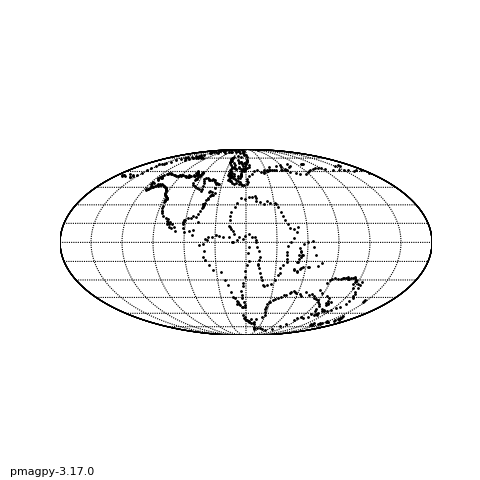

In [80]:
Image(filename='Cont_rot.png')

That is pretty ugly.  We can do it in higher resolution if we have the patience:  

In [317]:
!cont_rot.py -con af:eur:nam:sam:ind:aus:ant -age 100 -prj moll -sym k. 1 -sav -fmt png -res i

this resolution will take a while - be patient
1  saved in  Cont_rot.png


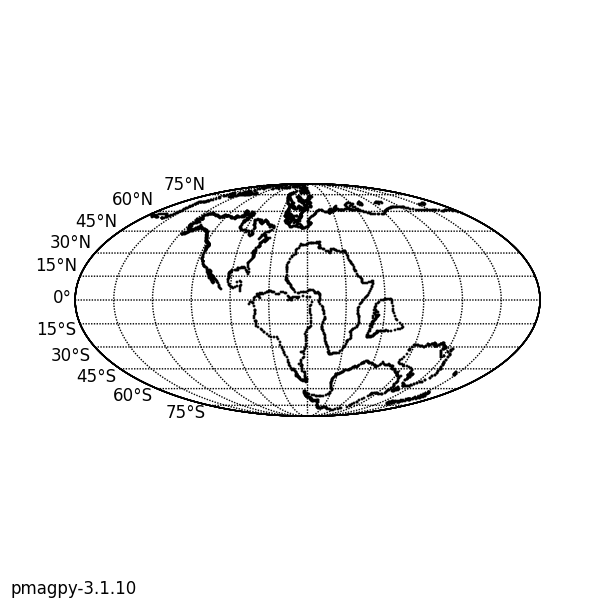

In [318]:
Image(filename='Cont_rot.png')

Well, it is better.  We really should be using GPlates, which is beautiful and very functional, but for the purpose of learning about these things, this approach is fine.